# Part d): Classification  analysis using neural networks

In this part, we study the Wisconsin Breast Cancer data set. First, we study the accuracy score using our own FFNN code as a function of varying hyper-parameters like learning rate and that regularization parameter, various activation functions, number of hidden layers and nodes and activation functions. Then, we compare the results to the those obtained using TensorFlow/Keras.

## Imports and loading the datasets

Here, the needed functions are imported and the Wisconsin Breast Cancer data set is loaded.

In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
import pickle
import os 

# Loading dataset
np.random.seed(0)        #create same seed for random number every time
cancer=load_breast_cancer()      #Download breast cancer dataset
inputs=cancer.data                     #Feature matrix of 569 rows (samples) and 30 columns (parameters)
outputs=cancer.target                  #Label array of 569 rows (0 for benign and 1 for malignant)
labels=cancer.feature_names[0:30]

#Print information about the datasets
print('The content of the breast cancer dataset is:')
print(labels)
print('-------------------------')
print("inputs =  " + str(inputs.shape))
print("outputs =  " + str(outputs.shape))
print("labels =  "+ str(labels.shape))

#Reassign the Feature and Label matrices to other variables
x = inputs 
y = outputs

The content of the breast cancer dataset is:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
-------------------------
inputs =  (569, 30)
outputs =  (569,)
labels =  (30,)


## Visualisation of dataset

Here, the dataset is visualized.

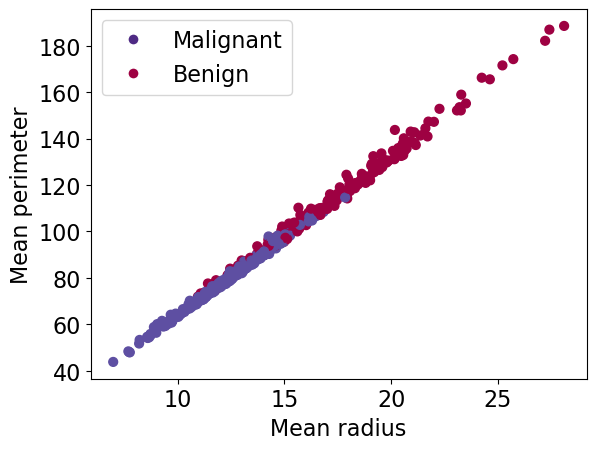

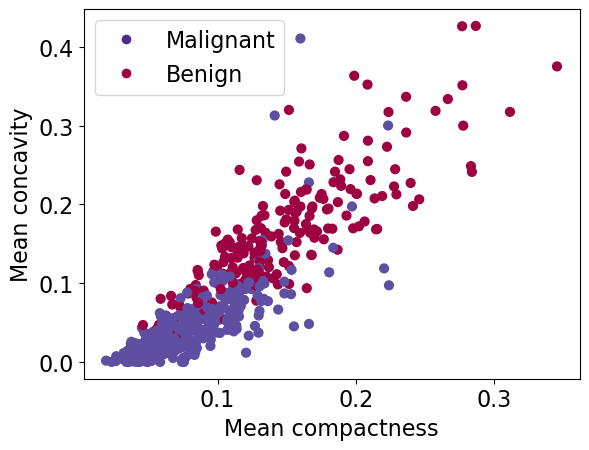

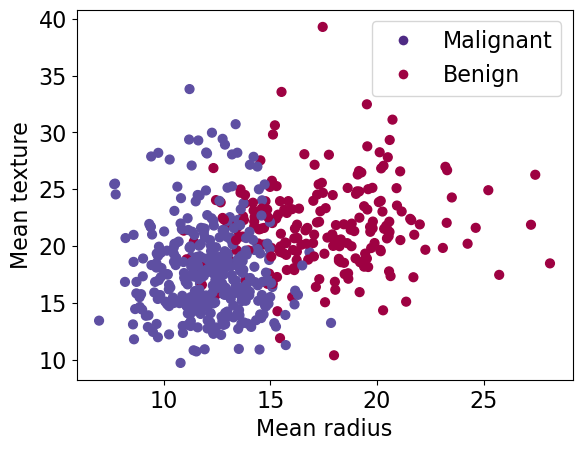

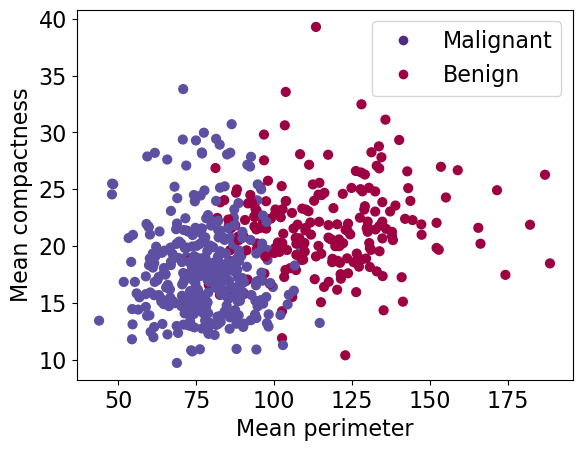

In [2]:
fontsize = 16

plt.figure()
plt.scatter(x[:,0],x[:,2],s=40,c=y,cmap=plt.cm.Spectral)
plt.xlabel('Mean radius', fontsize = fontsize)
plt.ylabel('Mean perimeter', fontsize = fontsize)
plt.tick_params(axis='both', labelsize=fontsize)
legend1 = plt.Line2D([0], [0], marker='o', color='w', label='Malignant', markersize=8, markerfacecolor='#4E2A84')
legend2 = plt.Line2D([0], [0], marker='o', color='w', label='Benign', markersize=8, markerfacecolor='#9E0142')
plt.legend(handles=[legend1, legend2], fontsize = fontsize)
plt.savefig('CancerRP.pdf', format='pdf', bbox_inches="tight")
plt.show()

plt.figure()
plt.scatter(x[:,5],x[:,6],s=40,c=y, cmap=plt.cm.Spectral)
plt.xlabel('Mean compactness', fontsize = fontsize)
plt.ylabel('Mean concavity', fontsize = fontsize)
plt.tick_params(axis='both', labelsize=fontsize)
plt.legend(handles=[legend1, legend2], fontsize = fontsize)
plt.savefig('CancerCC.pdf', format='pdf', bbox_inches="tight")
plt.show()

plt.figure()
plt.scatter(x[:,0],x[:,1],s=40,c=y,cmap=plt.cm.Spectral)
plt.xlabel('Mean radius', fontsize = fontsize)
plt.ylabel('Mean texture', fontsize = fontsize)
plt.tick_params(axis='both', labelsize=fontsize)
plt.legend(handles=[legend1, legend2], fontsize = fontsize)
plt.savefig('CancerRT.pdf', format='pdf', bbox_inches="tight")
plt.show()

plt.figure()
plt.scatter(x[:,2],x[:,1],s=40,c=y,cmap=plt.cm.Spectral)
plt.xlabel('Mean perimeter', fontsize = fontsize)
plt.ylabel('Mean compactness', fontsize = fontsize)
plt.tick_params(axis='both', labelsize=fontsize)
plt.legend(handles=[legend1, legend2], fontsize = fontsize)
plt.savefig('CancerPC.pdf', format='pdf', bbox_inches="tight")
plt.show()

## Correlation matrix

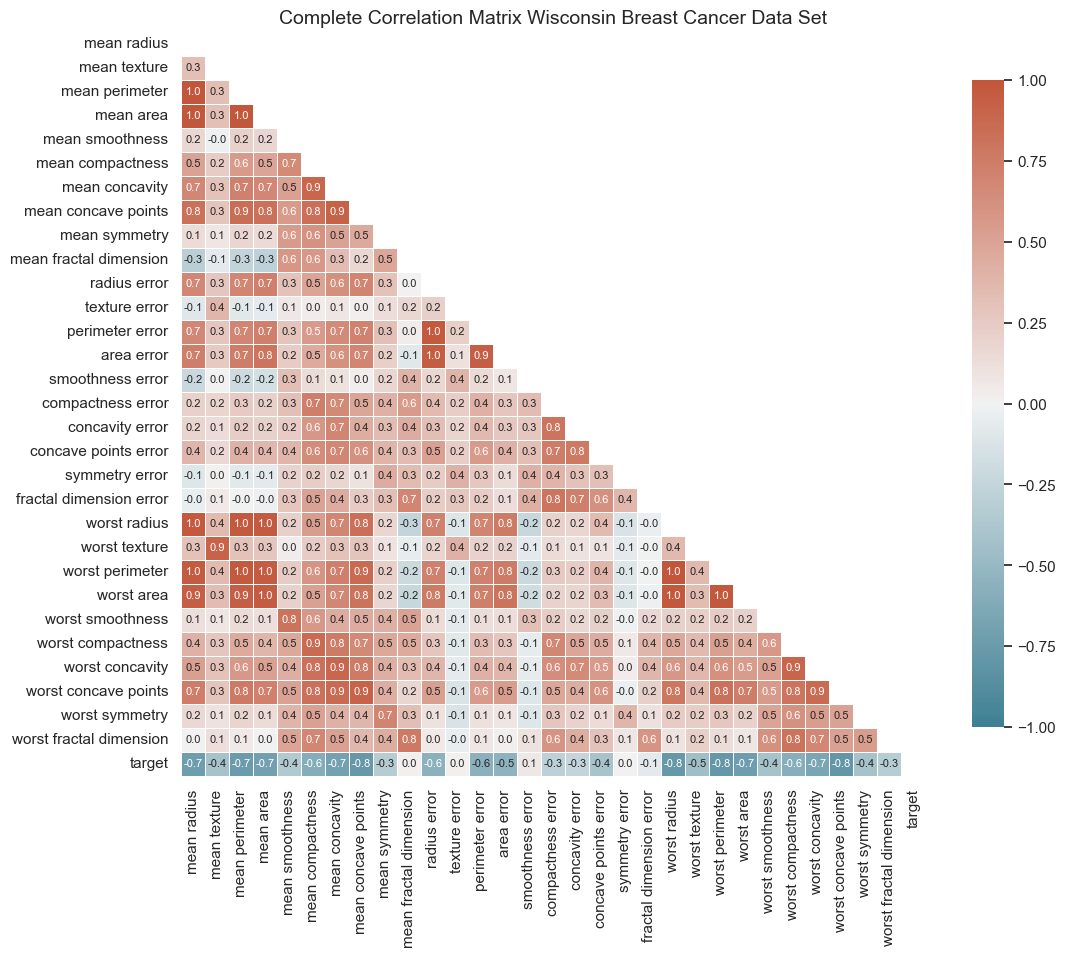

In [6]:
import pandas as pd

fontsize = 14
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
#selected_columns = ['mean texture', 'mean perimeter', 'mean compactness', 'mean symmetry']
df['target'] = data.target
corr_matrix = df.corr()
np.fill_diagonal(corr_matrix.values, 1)

annot_kws = {"size":8}
# Set up the matplotlib figure
sns.set(style="white")
plt.figure(figsize=(12,12))
plt.title('Complete Correlation Matrix Wisconsin Breast Cancer Data Set', fontsize = fontsize)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7}, annot = True, fmt=".1f", annot_kws=annot_kws)
plt.savefig('completecorrelation.pdf', format='pdf', bbox_inches="tight")
plt.show()

# Classification using tensorflow/keras

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential      #This allows appending layers to existing models
from tensorflow.keras.layers import Dense           #This allows defining the characteristics of a particular layer
from tensorflow.keras import optimizers             #This allows using whichever optimiser we want (sgd,adam,RMSprop)
from tensorflow.keras import regularizers           #This allows using whichever regularizer we want (l1,l2,l1_l2)
from tensorflow.keras.utils import to_categorical   #This allows using categorical cross entropy as the cost function
from sklearn.model_selection import train_test_split as splitter

x=inputs #Reassign the Feature and Label matrices to other variables
y=outputs

# Generate training and testing datasets
#Select features relevant to classification (texture,perimeter,compactness and symmetery) 
#and add to input matrix
temp1=np.reshape(x[:,1],(len(x[:,1]),1))
temp2=np.reshape(x[:,2],(len(x[:,2]),1))
X=np.hstack((temp1,temp2))      
temp=np.reshape(x[:,5],(len(x[:,5]),1))
X=np.hstack((X,temp))       
temp=np.reshape(x[:,8],(len(x[:,8]),1))
X=np.hstack((X,temp))       

X_train,X_test,y_train,y_test=splitter(X,y,test_size=0.3)   #Split datasets into training and testing
y_train=to_categorical(y_train)     #Convert labels to categorical when using categorical cross entropy
y_test=to_categorical(y_test)
del temp1,temp2,temp

# Define tunable parameters
eta=np.logspace(-4,-1,4)                    #Define vector of learning rates (parameter to SGD optimiser)
#lamda=np.logspace(-5,-1,5)                                  #Define hyperparameter
lamda = 0.01
n_layers=1                                  #Define number of hidden layers in the model
n_neuron=np.logspace(0,3,4,dtype=int)       #Define number of neurons per layer
#n_neuron = 100
epochs=100                                   #Number of reiterations over the input data
batch_size=100                              #Number of samples per gradient update

# Define function to return Deep Neural Network model
def NN_model(inputsize,n_layers,n_neuron,eta,lamda):
    model=Sequential()      
    for i in range(n_layers):       #Run loop to add hidden layers to the model
        if (i==0):                  #First layer requires input dimensions
            model.add(Dense(n_neuron,activation='relu',kernel_regularizer=regularizers.l2(lamda),input_dim=inputsize))
        else:                       #Subsequent layers are capable of automatic shape inferencing
            model.add(Dense(n_neuron,activation='relu',kernel_regularizer=regularizers.l2(lamda)))
    model.add(Dense(2,activation='softmax'))  #2 outputs - ordered and disordered (softmax for prob)
    sgd=optimizers.SGD(lr=eta)
    model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
    return model
   
Train_accuracy=np.zeros((len(n_neuron),len(eta)))      #Define matrices to store accuracy scores as a function
Test_accuracy=np.zeros((len(n_neuron),len(eta)))       #of learning rate and number of hidden neurons for 

for i in range(len(n_neuron)):     #run loops over hidden neurons and learning rates to calculate 
    for j in range(len(eta)):      #accuracy scores 
        DNN_model=NN_model(X_train.shape[1],n_layers,n_neuron[i],eta[j],lamda)
        DNN_model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,verbose=1)
        Train_accuracy[i,j]=DNN_model.evaluate(X_train,y_train)[1]
        Test_accuracy[i,j]=DNN_model.evaluate(X_test,y_test)[1]   

def plot_data(x,y,data,title=None):
    data*=100
    fig, ax = plt.subplots(figsize = (6, 6))
    sns.heatmap(data, annot=True, ax=ax, cmap="viridis", xticklabels=x, yticklabels=y, fmt=".1f",  annot_kws={"size": fontsize},  vmin=0, vmax=100)
    ax.set_ylabel("Learning Rate", fontsize=fontsize)
    ax.set_xlabel("Hidden Neurons", fontsize=fontsize)
    plt.tick_params(axis='both', labelsize=fontsize)
    #plt.tight_layout()
    if str(data) == str(Train_accuracy):
        ax.set_title("Training Accuracy TensorFlow [%]", fontsize = fontsize)
        plt.savefig('C_TF_NeuLR_Train.pdf', format='pdf', bbox_inches="tight")
    elif str(data) == str(Test_accuracy):
        ax.set_title("Testing Accuracy TensorFlow [%]", fontsize = fontsize)
        plt.savefig('C_TF_NeuLR_Test.pdf', format='pdf', bbox_inches="tight")
    plt.show()
 
fontsize = 12
plot_data(n_neuron,eta,Train_accuracy, 'Training')
plot_data(n_neuron,eta,Test_accuracy, 'Testing')

'   \nTrain_accuracy=np.zeros((len(n_neuron),len(eta)))      #Define matrices to store accuracy scores as a function\nTest_accuracy=np.zeros((len(n_neuron),len(eta)))       #of learning rate and number of hidden neurons for \n\nfor i in range(len(n_neuron)):     #run loops over hidden neurons and learning rates to calculate \n    for j in range(len(eta)):      #accuracy scores \n        DNN_model=NN_model(X_train.shape[1],n_layers,n_neuron[i],eta[j],lamda)\n        DNN_model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,verbose=1)\n        Train_accuracy[i,j]=DNN_model.evaluate(X_train,y_train)[1]\n        Test_accuracy[i,j]=DNN_model.evaluate(X_test,y_test)[1]   \n\ndef plot_data(x,y,data,title=None):\n    data*=100\n    fig, ax = plt.subplots(figsize = (6, 6))\n    sns.heatmap(data, annot=True, ax=ax, cmap="viridis", xticklabels=x, yticklabels=y, fmt=".1f",  annot_kws={"size": fontsize},  vmin=0, vmax=100)\n    ax.set_ylabel("Learning Rate", fontsize=fontsize)\n    ax.set_x

## Measuring time hyperparameters

In [4]:
import time

def measure_time(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        elapsed_time = end_time - start_time
        print(f"Elapsed time: {elapsed_time:.6f} seconds")
        return result
    return wrapper

n_neuron = 100
epochs = 1000
eta = 0.01
lamda = 0.01

# Example function to measure
@measure_time
def example_function(n_layers):
    # Your code here
    DNN_model=NN_model(X_train.shape[1],n_layers,n_neuron,eta,lamda)
    DNN_model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,verbose=1)
    Train_accuracy=DNN_model.evaluate(X_train,y_train)[1]
    Test_accuracy=DNN_model.evaluate(X_test,y_test)[1] 
    print(n_layers, Train_accuracy)
    print(n_layers, Test_accuracy)
    time.sleep(0)

# Call the decorated function
example_function(1)

Epoch 1/1000
4/4 [==============================] - 0s 3ms/step - loss: 29.4776 - accuracy: 0.4397
Epoch 2/1000
4/4 [==============================] - 0s 3ms/step - loss: 4.0619 - accuracy: 0.5050
Epoch 3/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7033 - accuracy: 0.6457
Epoch 4/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.6533
Epoch 5/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7069 - accuracy: 0.6357
Epoch 6/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.6533
Epoch 7/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6809 - accuracy: 0.6382
Epoch 8/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7127 - accuracy: 0.6256
Epoch 9/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7022 - accuracy: 0.6080
Epoch 10/1000
4/4 [==============================] - 0s 0s/step - loss: 0.6788 - accuracy: 0.6583
Epoch 11/1000
4/4 [

4/4 [==============================] - 0s 3ms/step - loss: 0.6340 - accuracy: 0.7060
Epoch 85/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6362 - accuracy: 0.6784
Epoch 86/1000
4/4 [==============================] - 0s 0s/step - loss: 0.6352 - accuracy: 0.7035
Epoch 87/1000
4/4 [==============================] - 0s 0s/step - loss: 0.6333 - accuracy: 0.6784
Epoch 88/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6323 - accuracy: 0.7060
Epoch 89/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6311 - accuracy: 0.7085
Epoch 90/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6320 - accuracy: 0.6859
Epoch 91/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6354 - accuracy: 0.6935
Epoch 92/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6311 - accuracy: 0.7035
Epoch 93/1000
4/4 [==============================] - 0s 0s/step - loss: 0.6316 - accuracy: 0.6884
Epoch 94/1000
4/4 [========

4/4 [==============================] - 0s 3ms/step - loss: 0.6033 - accuracy: 0.7161
Epoch 167/1000
4/4 [==============================] - 0s 0s/step - loss: 0.6131 - accuracy: 0.7060
Epoch 168/1000
4/4 [==============================] - 0s 0s/step - loss: 0.6071 - accuracy: 0.7261
Epoch 169/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6050 - accuracy: 0.7312
Epoch 170/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6036 - accuracy: 0.7337
Epoch 171/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6189 - accuracy: 0.6884
Epoch 172/1000
4/4 [==============================] - 0s 0s/step - loss: 0.6024 - accuracy: 0.7286
Epoch 173/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6170 - accuracy: 0.6910
Epoch 174/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6030 - accuracy: 0.7312
Epoch 175/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6026 - accuracy: 0.7337
Epoch 176/1000
4/4

4/4 [==============================] - 0s 0s/step - loss: 0.5797 - accuracy: 0.7739
Epoch 249/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5800 - accuracy: 0.7513
Epoch 250/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5862 - accuracy: 0.7513
Epoch 251/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5766 - accuracy: 0.7739
Epoch 252/1000
4/4 [==============================] - 0s 0s/step - loss: 0.5793 - accuracy: 0.7563
Epoch 253/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5802 - accuracy: 0.7588
Epoch 254/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5882 - accuracy: 0.7337
Epoch 255/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5789 - accuracy: 0.7663
Epoch 256/1000
4/4 [==============================] - 0s 0s/step - loss: 0.5772 - accuracy: 0.7462
Epoch 257/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5802 - accuracy: 0.7462
Epoch 258/1000
4/4

4/4 [==============================] - 0s 3ms/step - loss: 0.5573 - accuracy: 0.7588
Epoch 331/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5558 - accuracy: 0.7789
Epoch 332/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5582 - accuracy: 0.7688
Epoch 333/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5551 - accuracy: 0.7889
Epoch 334/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5544 - accuracy: 0.7940
Epoch 335/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5629 - accuracy: 0.7789
Epoch 336/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5584 - accuracy: 0.7789
Epoch 337/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5604 - accuracy: 0.7764
Epoch 338/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5553 - accuracy: 0.7915
Epoch 339/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5607 - accuracy: 0.7538
Epoch 340/1000


4/4 [==============================] - 0s 3ms/step - loss: 0.5360 - accuracy: 0.8065
Epoch 413/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5389 - accuracy: 0.7965
Epoch 414/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5333 - accuracy: 0.8065
Epoch 415/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5350 - accuracy: 0.8090
Epoch 416/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5361 - accuracy: 0.7940
Epoch 417/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5427 - accuracy: 0.7864
Epoch 418/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5388 - accuracy: 0.7789
Epoch 419/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5338 - accuracy: 0.8065
Epoch 420/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5324 - accuracy: 0.7889
Epoch 421/1000
4/4 [==============================] - 0s 0s/step - loss: 0.5343 - accuracy: 0.7889
Epoch 422/1000
4

4/4 [==============================] - 0s 3ms/step - loss: 0.5151 - accuracy: 0.8166
Epoch 495/1000
4/4 [==============================] - 0s 0s/step - loss: 0.5154 - accuracy: 0.7965
Epoch 496/1000
4/4 [==============================] - 0s 0s/step - loss: 0.5175 - accuracy: 0.8141
Epoch 497/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5173 - accuracy: 0.8090
Epoch 498/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5299 - accuracy: 0.7789
Epoch 499/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5390 - accuracy: 0.7638
Epoch 500/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5150 - accuracy: 0.8166
Epoch 501/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5169 - accuracy: 0.8090
Epoch 502/1000
4/4 [==============================] - 0s 0s/step - loss: 0.5152 - accuracy: 0.8040
Epoch 503/1000
4/4 [==============================] - 0s 0s/step - loss: 0.5150 - accuracy: 0.8241
Epoch 504/1000
4/4 

4/4 [==============================] - 0s 3ms/step - loss: 0.5083 - accuracy: 0.7965
Epoch 577/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5057 - accuracy: 0.8367
Epoch 578/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5021 - accuracy: 0.8090
Epoch 579/1000
4/4 [==============================] - 0s 0s/step - loss: 0.4982 - accuracy: 0.8392
Epoch 580/1000
4/4 [==============================] - 0s 0s/step - loss: 0.4989 - accuracy: 0.8241
Epoch 581/1000
4/4 [==============================] - 0s 0s/step - loss: 0.5036 - accuracy: 0.8116
Epoch 582/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5103 - accuracy: 0.8015
Epoch 583/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4991 - accuracy: 0.8116
Epoch 584/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4982 - accuracy: 0.8241
Epoch 585/1000
4/4 [==============================] - 0s 0s/step - loss: 0.5025 - accuracy: 0.8166
Epoch 586/1000
4/4 

4/4 [==============================] - 0s 3ms/step - loss: 0.4843 - accuracy: 0.8317
Epoch 659/1000
4/4 [==============================] - 0s 0s/step - loss: 0.4880 - accuracy: 0.8241
Epoch 660/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4886 - accuracy: 0.8216
Epoch 661/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4908 - accuracy: 0.8191
Epoch 662/1000
4/4 [==============================] - 0s 0s/step - loss: 0.5064 - accuracy: 0.8116
Epoch 663/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4992 - accuracy: 0.8015
Epoch 664/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4920 - accuracy: 0.8141
Epoch 665/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4847 - accuracy: 0.8291
Epoch 666/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4858 - accuracy: 0.8141
Epoch 667/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4938 - accuracy: 0.8166
Epoch 668/1000
4/

4/4 [==============================] - 0s 3ms/step - loss: 0.4778 - accuracy: 0.8241
Epoch 741/1000
4/4 [==============================] - 0s 0s/step - loss: 0.4863 - accuracy: 0.8065
Epoch 742/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4899 - accuracy: 0.7965
Epoch 743/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4895 - accuracy: 0.8116
Epoch 744/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5179 - accuracy: 0.7487
Epoch 745/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4708 - accuracy: 0.8518
Epoch 746/1000
4/4 [==============================] - 0s 0s/step - loss: 0.4828 - accuracy: 0.8266
Epoch 747/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5301 - accuracy: 0.7538
Epoch 748/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4820 - accuracy: 0.8065
Epoch 749/1000
4/4 [==============================] - 0s 0s/step - loss: 0.4700 - accuracy: 0.8216
Epoch 750/1000
4/4

4/4 [==============================] - 0s 3ms/step - loss: 0.4846 - accuracy: 0.7940
Epoch 823/1000
4/4 [==============================] - 0s 0s/step - loss: 0.4618 - accuracy: 0.8367
Epoch 824/1000
4/4 [==============================] - 0s 0s/step - loss: 0.4615 - accuracy: 0.8342
Epoch 825/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4577 - accuracy: 0.8342
Epoch 826/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4548 - accuracy: 0.8518
Epoch 827/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4657 - accuracy: 0.8417
Epoch 828/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4667 - accuracy: 0.8216
Epoch 829/1000
4/4 [==============================] - 0s 0s/step - loss: 0.4860 - accuracy: 0.8166
Epoch 830/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4593 - accuracy: 0.8367
Epoch 831/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4640 - accuracy: 0.8342
Epoch 832/1000
4/4

4/4 [==============================] - 0s 3ms/step - loss: 0.4537 - accuracy: 0.8291
Epoch 905/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4563 - accuracy: 0.8367
Epoch 906/1000
4/4 [==============================] - 0s 0s/step - loss: 0.4713 - accuracy: 0.8015
Epoch 907/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4719 - accuracy: 0.8116
Epoch 908/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4493 - accuracy: 0.8467
Epoch 909/1000
4/4 [==============================] - 0s 0s/step - loss: 0.4519 - accuracy: 0.8442
Epoch 910/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4471 - accuracy: 0.8518
Epoch 911/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4516 - accuracy: 0.8442
Epoch 912/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4560 - accuracy: 0.8241
Epoch 913/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4501 - accuracy: 0.8492
Epoch 914/1000
4/

4/4 [==============================] - 0s 3ms/step - loss: 0.4456 - accuracy: 0.8367
Epoch 987/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4398 - accuracy: 0.8317
Epoch 988/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4404 - accuracy: 0.8392
Epoch 989/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4662 - accuracy: 0.7915
Epoch 990/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4755 - accuracy: 0.7940
Epoch 991/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4546 - accuracy: 0.8141
Epoch 992/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4383 - accuracy: 0.8492
Epoch 993/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4398 - accuracy: 0.8392
Epoch 994/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4887 - accuracy: 0.7613
Epoch 995/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4489 - accuracy: 0.8317
Epoch 996/1000


## Optimization of number of layers

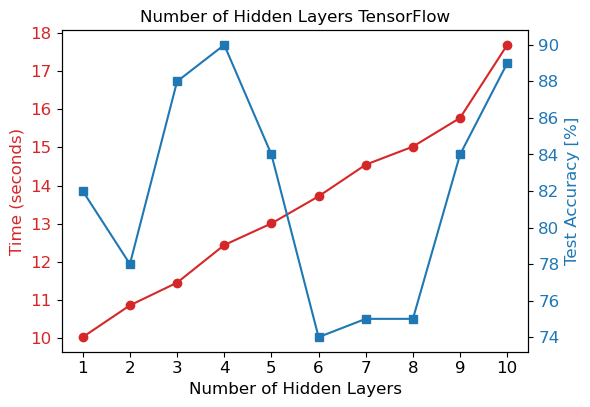

In [5]:
fontsize = 12
    
fig, ax1 = plt.subplots(figsize = (6, 4))
ax1.set_xlabel('Number of Hidden Layers', fontsize = fontsize)
ax1.set_xticks([1,2,3,4,5,6,7,8,9,10])
ax1.set_ylabel('Time (seconds)', color='tab:red', fontsize = fontsize)
ax1.plot([1,2,3,4,5,6,7,8,9,10], [10.023, 10.857, 11.452, 12.439, 13.006, 13.717, 14.548, 15.022, 15.775, 17.691], color='tab:red', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:red')
plt.tick_params(axis='both', labelsize=fontsize)


ax2 = ax1.twinx()  
ax2.set_ylabel('Test Accuracy [%]', color='tab:blue', fontsize = fontsize)  
ax2.plot([1,2,3,4,5,6,7,8,9,10], [82, 78, 88, 90, 84, 74, 75, 75, 84, 89], color='tab:blue', marker='s')
ax2.tick_params(axis='y', labelcolor='tab:blue')
plt.tick_params(axis='both', labelsize=fontsize)

fig.tight_layout()  
plt.title('Number of Hidden Layers TensorFlow', fontsize = fontsize)
plt.savefig('HiddenLayers.pdf', format='pdf', bbox_inches="tight")
plt.show()